In [1]:
# This example imports functions from the DemoReadSGLXData module to read
# digital data. The metadata file must be present in the same directory as the binary file.
# Works with both imec and nidq digital channels.
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from tkinter import Tk
from tkinter import filedialog
from readSGLX import readMeta, SampRate, makeMemMapRaw, ExtractDigital

In [2]:
# Get file from user
root = Tk()         # create the Tkinter widget
root.withdraw()     # hide the Tkinter root window

# Windows specific; forces the window to appear in front
root.attributes("-topmost", True)

binFullPath = Path(filedialog.askopenfilename(title="Select binary file"))

root.destroy()

2023-08-23 12:18:46.230 python[39893:22349024] +[CATransaction synchronize] called within transaction


In [9]:
# Other parameters about what data to read
tStart = 0        # in seconds
tEnd = 1
# Which digital word to read. 
# For imec, there is only 1 digital word, dw = 0.
# For NI, digital lines 0-15 are in word 0, lines 16-31 are in word 1, etc.
dw = 0    
# Which lines within the digital word, zero-based
# Note that the SYNC line for PXI 3B is stored in line 6.
dLineList = [0,1,6]

In [10]:
meta = readMeta(binFullPath)
sRate = SampRate(meta)

firstSamp = int(sRate*tStart)
lastSamp = int(sRate*tEnd)
rawData = makeMemMapRaw(binFullPath, meta)

# get digital data for the selected lines
digArray = ExtractDigital(rawData, firstSamp, lastSamp, dw, dLineList, meta)


nChan: 5, nFileSamp: 898853


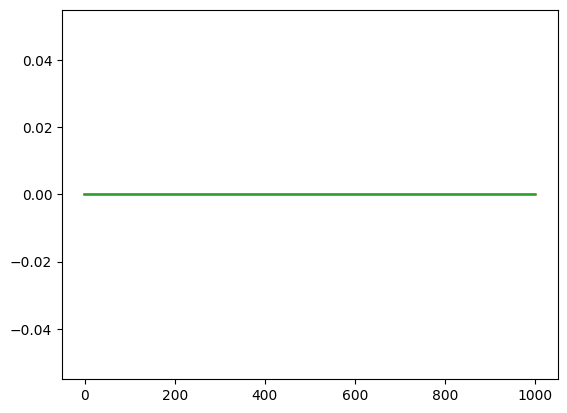

: 

In [11]:
# Plot the extracted digital channels
tDat = np.arange(firstSamp, lastSamp+1)
tDat = 1000*tDat/sRate      # plot time axis in msec
fig, ax = plt.subplots()
for i in range(0, len(dLineList)):
    ax.plot(tDat, digArray[i, :])
plt.show()

